# Coding Exercise for the Data Scientist Position 

## Instructions

This coding exercise should be performed in python (which is the programming language used by the team). You are free to use the internet and any other libraries. Please save your work in a Jupyter notebook and email it to us for review.

Data file: cruise_ship_info.csv (this file will be emailed to you)

Objective: Build a regressor that recommends the “crew” size for potential ship buyers. Please do the following steps (hint: use numpy, scipy, pandas, sklearn and matplotlib)

-------

1. Read the file and display columns.

2. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations.

3. Select columns that will be probably important to predict “crew” size.

4. If you removed columns explain why you removed those.

5. Use one-hot encoding for categorical features.

6. Create training and testing sets (use 60% of the data for the training and reminder for testing).

7. Build a machine learning model to predict the ‘crew’ size.

8. Calculate the Pearson correlation coefficient for the training set and testing data sets.

9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.

10. What is regularization? What is the regularization parameter in your model?

------

Plot regularization parameter value vs Pearson correlation for the test and training sets, and see whether your model has a bias problem or variance problem.

**3 days, no formal report needed. Due 16th May 2020, 15.08**

https://towardsdatascience.com/project-report-for-data-science-coding-exercise-9a9c76a09be8


# Crew Size Regressor

In this take-home exercise we will build a regressor that recommends the “crew” size for potential ship buyers.

<img src="nutshell.png" alt="drawing" width="600"/>

We will follow the approach to Data Science adviced by the course "Data Science Methodology" (Coursera e-learning).

The first step is to understand what is the business problem. We want to optimize the crew size for a ship buyer, considering different features as dimension of boat and the cabins, the number of passengers. 

The data are yielded by the society that gives the challenge.

The idea is to build a model to understand this number. There could be different approaches. 
It could be used a Multilinear Regression Model depending on different features of boats. Another approach could be using clustering to cluster the dataset and see if there is an adviced crew size for a certain type of boats. 


In [174]:
##Import libraries
import pandas as pd
import pandas_profiling

from matplotlib import pyplot as plt
%matplotlib inline

from scipy import stats

import seaborn as sns

import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

import joblib

## Getting Dataset

In [177]:
## Download data from raw github
!wget -nc --no-check-certificate --content-disposition https://raw.githubusercontent.com/bot13956/ML_Model_for_Predicting_Ships_Crew_Size/master/cruise_ship_info.csv

--2020-05-14 15:16:41--  https://raw.githubusercontent.com/bot13956/ML_Model_for_Predicting_Ships_Crew_Size/master/cruise_ship_info.csv
Resolving raw.githubusercontent.com... 151.101.240.133
Connecting to raw.githubusercontent.com|151.101.240.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [136]:
## import dataset in a data frame
df = pd.read_csv("cruise_ship_info.csv")

In [137]:
## Let's see the variables in the dataset
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [138]:
df.shape

(158, 9)

We have 158 samples and 9 variables. We can find two categorical variables and 7 numerical.

In [139]:
print(df.isna().sum())

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64


**There are no missing values!**

-------------
Interesting Variables are:
- the age of the ship. It could influence the possible crew on the boat. It is possibile a relation with the year. At the same Volume the goes lowering;

- Dimension with tonnage, length surely can influence the crew size;

- The line could be an important parameter. Maybe on the shortest paths the crew could be greater

- passengers and cabins could be a parameter to consider but less impacting on the crew.


In [140]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


The variable length is not varying too much. Indeed, it has a little Standard Deviation. The idea is it could impact not too much in the extimation of the crew size. 

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11deb8090>,
      dtype=object)

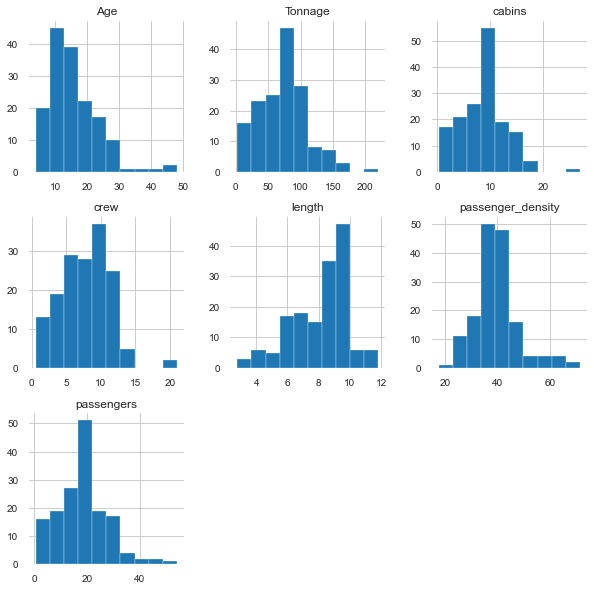

In [141]:
df.hist(figsize = [10,10])

In [142]:
## Do a profile of the file to get some insights
#profile = df.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="cruise_ship.html")

Let's do some analysis

In [143]:
df['Ship_name'].value_counts()

Spirit       4
Legend       3
Star         3
Freedom      2
Navigator    2
            ..
Amsterdam    1
Volendam     1
Marina       1
Solstice     1
Radiance     1
Name: Ship_name, Length: 138, dtype: int64

**There are many different boats!**

In [144]:
df['Cruise_line'].value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Cunard                3
Oceania               3
Seabourn              3
Windstar              3
Crystal               2
Disney                2
Azamara               2
Orient                1
Name: Cruise_line, dtype: int64

The lines are more grouped

Text(0.5, 0.98, 'Highly Correlated Variables')

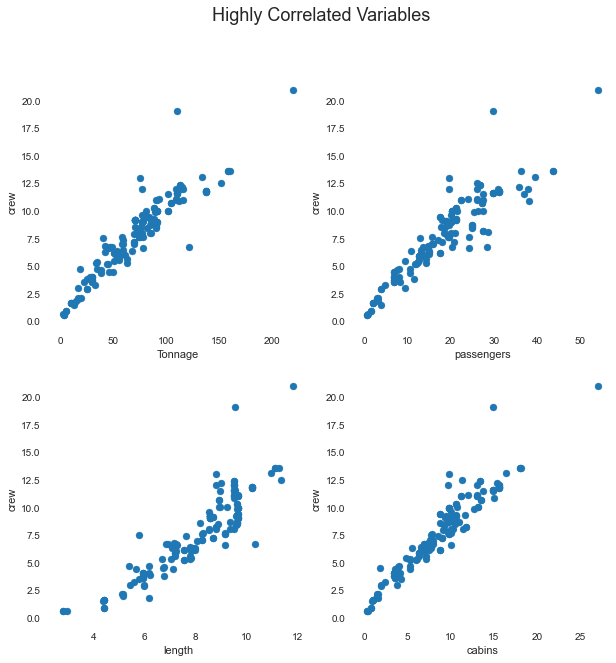

In [145]:
## Idealmente ci sono 4 variabili utili per il fit
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
fig.set_size_inches(10, 10)

axs[0, 0].scatter(df['Tonnage'], df['crew'])
axs[0, 0].set_xlabel('Tonnage')
axs[0, 0].set_ylabel('crew')

axs[0, 1].scatter(df['passengers'], df['crew'])
axs[0, 1].set_xlabel('passengers')
axs[0, 1].set_ylabel('crew')

axs[1, 0].scatter(df['length'], df['crew'])
axs[1, 0].set_xlabel('length')
axs[1, 0].set_ylabel('crew')

axs[1, 1].scatter(df['cabins'], df['crew'])
axs[1, 1].set_xlabel('cabins')
axs[1, 1].set_ylabel('crew')

fig.suptitle('Highly Correlated Variables', fontsize=18)


Text(0, 0.5, 'crew')

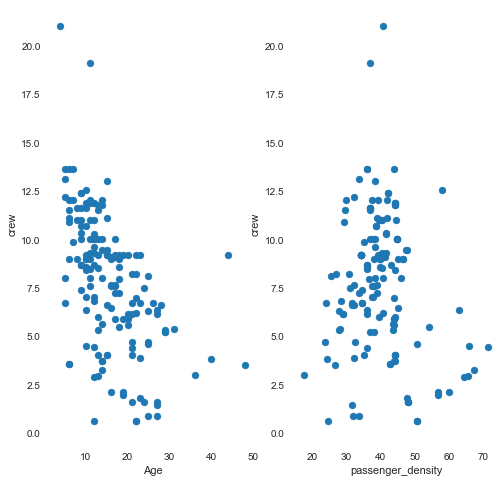

In [146]:
fig, axs = plt.subplots(1, 2)  # a figure with a 2x2 grid of Axes
fig.set_size_inches(8, 8)

axs[0].scatter(df['Age'], df['crew'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('crew')

axs[1].scatter(df['passenger_density'], df['crew'])
axs[1].set_xlabel('passenger_density')
axs[1].set_ylabel('crew')

In [147]:
stats.pearsonr(df['passenger_density'], df['crew'])

(-0.1555092842169973, 0.05104673542854471)

In [148]:
stats.pearsonr(df['Age'], df['crew'])

(-0.5306565039638854, 7.41074222714442e-13)

Finally, we could say passenger_density is a variable that doesn't impact very much on crew size. Age impacts negatively as we could expect. 4 variables are very correlated, that are:
- Tonnage
- passengers
- length
- cabins

We can add also Age that has a little correlation

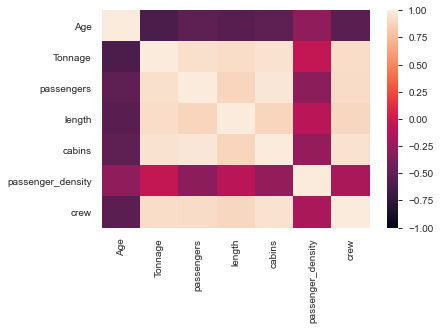

In [149]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1)

This plot summarizes everything explained. 

It could be interesting notice if there is a sort of dependency from categorical variables. For example, a certain line imposes a size for the crew.

Let's do Label Encoding to do evaluation of the variables respect to crew size. The problem of this approach is that using numbers includes a relationship, a hiearchy that could be misleading


In [150]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [151]:
## Backup Dataframe
df_encoded = df.copy(deep=True);
## Create an instance for LabelEncoder
labelEncoder = LabelEncoder()
## Do Transformation
df_encoded['Ship_name'] = labelEncoder.fit_transform(df_encoded['Ship_name'])
df_encoded['Cruise_line'] = labelEncoder.fit_transform(df_encoded['Cruise_line'])


In [152]:
df_encoded.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,52,0,6,30.277,6.94,5.94,3.55,42.64,3.55
1,91,0,6,30.277,6.94,5.94,3.55,42.64,3.55
2,11,1,26,47.262,14.86,7.22,7.43,31.80,6.70
3,15,1,11,110.000,29.74,9.53,14.88,36.99,19.10
4,20,1,17,101.353,26.42,8.92,13.21,38.36,10.00


In [153]:
#pd.get_dummies(df['Ship_name'], dtype=float)

Text(0, 0.5, 'crew')

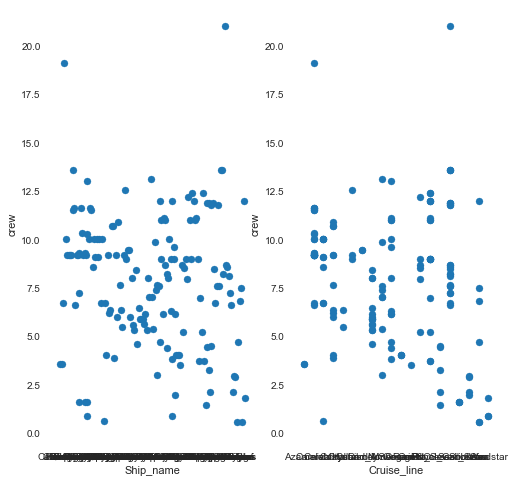

In [154]:
fig, axs = plt.subplots(1, 2)  # a figure with a 2x2 grid of Axes
fig.set_size_inches(8, 8)

axs[0].scatter(df['Ship_name'], df['crew'])
axs[0].set_xlabel('Ship_name')
axs[0].set_ylabel('crew')

axs[1].scatter(df['Cruise_line'], df['crew'])
axs[1].set_xlabel('Cruise_line')
axs[1].set_ylabel('crew')

In [155]:
stats.pearsonr(df_encoded['Ship_name'], df_encoded['crew'])

(-0.20114262943277547, 0.011270331626155402)

In [156]:
stats.pearsonr(df_encoded['Cruise_line'], df_encoded['crew'])

(-0.21168714292828594, 0.007583609325745481)

**Now we can conclude there is non dependency from the model or the line of the boat**

We will use passengers, Tonnage, cabins, length and Age to build our regressor

## Build the model

We want to build a multi regression model

In [157]:
X = df[['Tonnage', 'length', 'passengers', 'cabins', 'Age']]
y = df[['crew']]

In [158]:
X

,Tonnage,length,passengers,cabins,Age
0,30.277,5.94,6.94,3.55,6
1,30.277,5.94,6.94,3.55,6
2,47.262,7.22,14.86,7.43,26
3,110.000,9.53,29.74,14.88,11
4,101.353,8.92,26.42,13.21,17
...,...,...,...,...,...
153,3.341,2.79,0.66,0.33,22
154,76.800,8.79,19.60,9.67,14
155,5.350,4.40,1.58,0.74,25
156,5.350,4.40,1.67,0.74,27


In [159]:
y

,crew
0,3.55
1,3.55
2,6.70
3,19.10
4,10.00
...,...
153,0.59
154,12.00
155,0.88
156,0.88


**The first step in building a model is scaling the data in Z varibles as:**

\begin{equation}Z = \frac{X-\mu}{\sigma}\end{equation}




In [160]:
scaler = StandardScaler()
Z = scaler.fit_transform(X)

## Train Test Split the Dataset

In [161]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.4, random_state=1)##by default shuffle is True

## Build Regressor

In [162]:
linearRegression = LinearRegression()
linearRegression.fit(Z_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
y_pred = linearRegression.predict(Z_test)

In [164]:
print("The coefficient of determination is: {:.2f}".format(linearRegression.score(Z_train, y_train)))

The coefficient of determination is: 0.92


In [165]:
print("The accuracy as R-squared is: {:.2f}".format(linearRegression.score(Z_test, y_test)))

The accuracy as R-squared is: 0.94


We get a very good accuracy for the model. It is a very good regressor 

## Tuning

In [166]:
def buildAndTestModel(sz):
    Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=sz)##by default shuffle is True
 
    linearRegression = LinearRegression()
    linearRegression.fit(Z_train, y_train)
    
    y_pred = linearRegression.predict(Z_test)
    
    return linearRegression.score(Z_test, y_test)

In [167]:
### The parameter to tune is the dimension of test set.
### Let's change this parameter for a certain number of epochs
#### Then get what is the max for the dimension of test set for various epochs
test = np.arange(0.1, 0.5, 0.05)
epochs = 1000

listScores = []
for j in range(epochs):
    scores = []
    for i in test:
        scores.append(buildAndTestModel(i))
    listScores.append(scores)
df_scores = pd.DataFrame(listScores).transpose()
df_scores.set_index(test,inplace=True)
df_idxmax = df_scores.idxmax()

(array([270., 214., 152.,   0., 119.,  91.,   0.,  73.,  50.,  31.]),
 array([0.1  , 0.135, 0.17 , 0.205, 0.24 , 0.275, 0.31 , 0.345, 0.38 ,
        0.415, 0.45 ]),
 <a list of 10 Patch objects>)

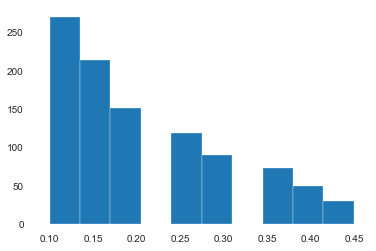

In [168]:
plt.hist(df_idxmax)

We can see after this analysis, a good choice for test set could be lower than 0.2

In [175]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=50)##by default shuffle is True
 
model = LinearRegression()
model.fit(Z_train, y_train)

y_pred = model.predict(Z_test)

model.score(Z_test, y_test)

0.9527046934168341

In [176]:
#joblib.dump(model, 'model_ship.pkl') 

['model_ship.pkl']